In [1]:
import pandas as pd

dataset = pd.read_csv('KAG_conversion_data.csv')
dataset.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [2]:
dataset.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


## Kategorički podaci

In [3]:
categores = ['age', 'gender']
for x in categores:
    print(dataset[x].value_counts())


30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64


C:\Users\Joca\AppData\Local\Temp/ipykernel_1876/183509.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby(categores)['Clicks','Spent'].mean().plot.bar()


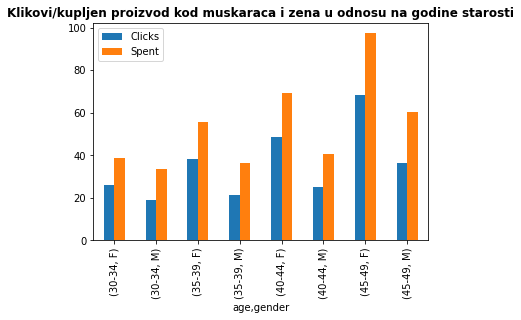

In [4]:
import matplotlib.pyplot as plt

dataset.groupby(categores)['Clicks','Spent'].mean().plot.bar()
plt.title('Klikovi/kupljen proizvod kod muskaraca i zena u odnosu na godine starosti', fontweight="bold")

plt.show()

### Konverzija u numericki tip

In [5]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for x in categores:
    dataset[x]= le.fit_transform(dataset[x])
    print(x, le.classes_)

age ['30-34' '35-39' '40-44' '45-49']
gender ['F' 'M']


### Brisanje ID kolone

In [6]:
dataset.drop('ad_id', inplace = True, axis = 1)
dataset.drop('xyz_campaign_id', inplace = True, axis = 1)
dataset.drop('fb_campaign_id', inplace = True, axis = 1)

<AxesSubplot:>

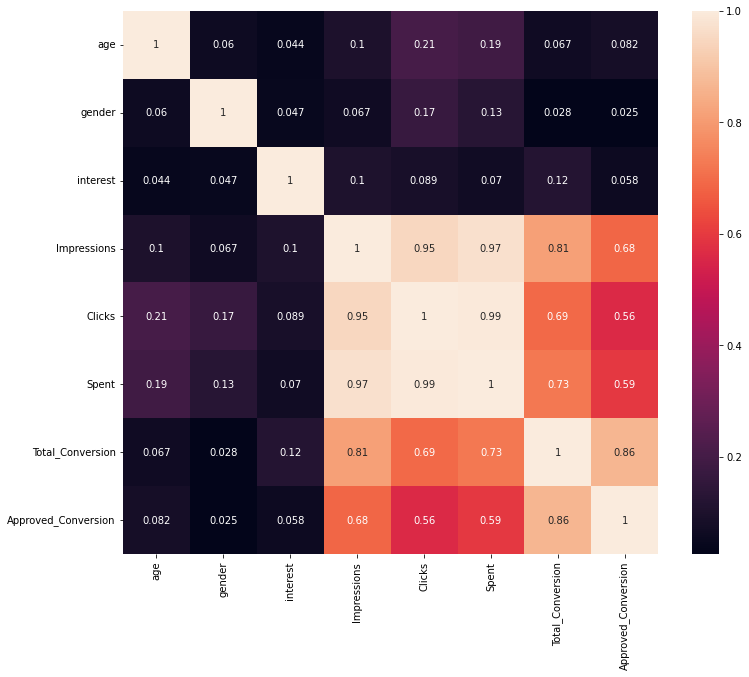

In [7]:
import seaborn as sns 
fig= plt.figure(figsize=(12,10))

sns.heatmap(dataset.corr().abs() , annot= True)

# Klasterizacija

In [8]:
relatedData = dataset.copy()
relatedData= relatedData[['Impressions', 'Clicks', 'Spent']]

In [9]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
dataset_scaled = pd.DataFrame(scale.fit_transform(relatedData) ,columns = relatedData.columns)

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia= []
k= np.arange(1,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    ab = model.fit(dataset_scaled.values)
    inertia.append(pd.Series({'k': i,
                              'inertia': model.inertia_
                             }))
    
inertias= pd.concat(inertia, axis=1).T.set_index('k')
inertias

,inertia
k,
1.0,3429.000000
2.0,996.484579
3.0,542.608407
4.0,352.434131
5.0,260.024024
6.0,186.994134
7.0,147.878445
8.0,126.474787


NameError: name 'data' is not defined